**Amazon prime Movies and TV Shows**


**Abstract of the project:**

Amazon Prime is another one of the most popular media and video streaming platforms. They have close to 10000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.


**Applications**

  1.Understanding what content is available in different countries
  
  2.Identifying similar content by matching text-based features
  
  3.Network analysis of Actors / Directors and find interesting insights
  
  4.Does Amazon Prime has more focus on TV

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import warnings
warnings.filterwarnings('ignore')

In [34]:
data = pd.read_csv('amazon_prime_titles.csv')

The head function provides the first few rows of a dataset

In [35]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


The duplicate function shows the duplicate values, but no duplicate values are displayed here.

In [36]:
data.duplicated().sum()

0

The describe function provides a summary of statistics for a dataset

In [37]:
data.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


The info function provides a summary of the dataset, including the number of non-null entries, data types, and memory usage

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


The is.na() function checks for missing values

In [39]:
data.isna().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [40]:
#Filling the null values
data['director'].fillna('Uavailable', inplace = True)
data['cast'].fillna('Uavailable', inplace = True)
data['country'].fillna('Uavailable', inplace = True)
data['date_added'] = data['date_added'].ffill()
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])

In [41]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [42]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",Uavailable,"October 10, 2021",1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,Uavailable,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",Uavailable,"October 10, 2021",2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",Uavailable,"October 10, 2021",2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,Uavailable,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",Uavailable,"October 10, 2021",2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",Uavailable,"October 10, 2021",2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


In [43]:
#top 10 diretors with most directed movies
filtered_directors = data[data['director'] != 'Uavailable']
top_directors = filtered_directors['director'].value_counts().head(10)

Here We analyzed a movie dataset to identify the top 10 most prolific directors, excluding those listed as 'Uavailable'. It will filters out these directors, counts their movies, and visualizes the results using a bar plot with Seaborn

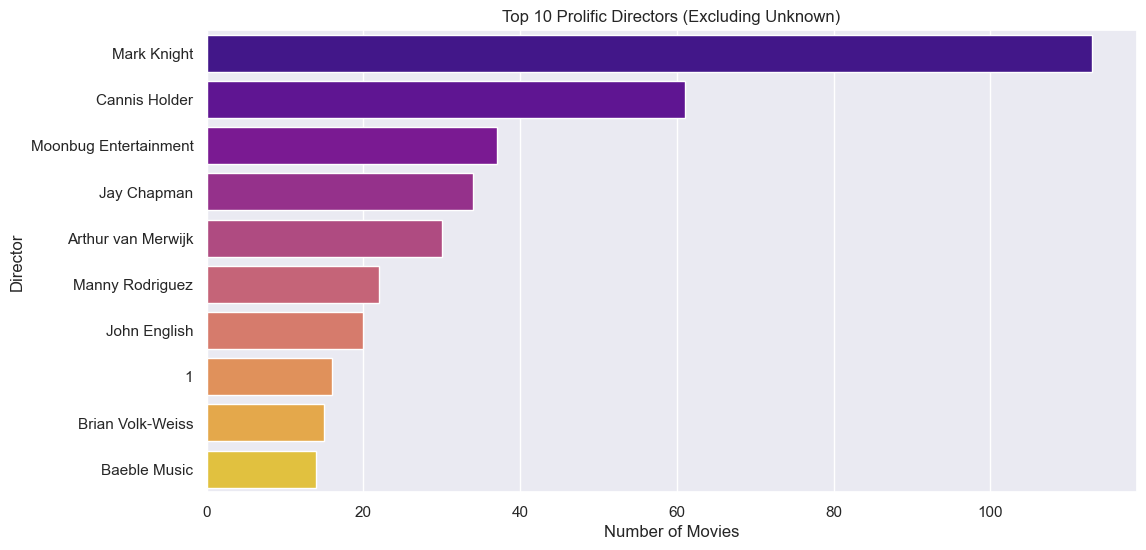

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='plasma')
plt.title('Top 10 Prolific Directors (Excluding Unknown)')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

In [45]:
filtered_actors = data[data['cast'] != 'Uavailable']
top_actors = filtered_actors['cast'].value_counts().head(10)

we examined a movie dataset to highlight the top 10 most prolific actors, excluding those labeled as 'Uavailable'. This code filters out such actors, counts their movie appearances, and displays the results visually with a Seaborn bar plot

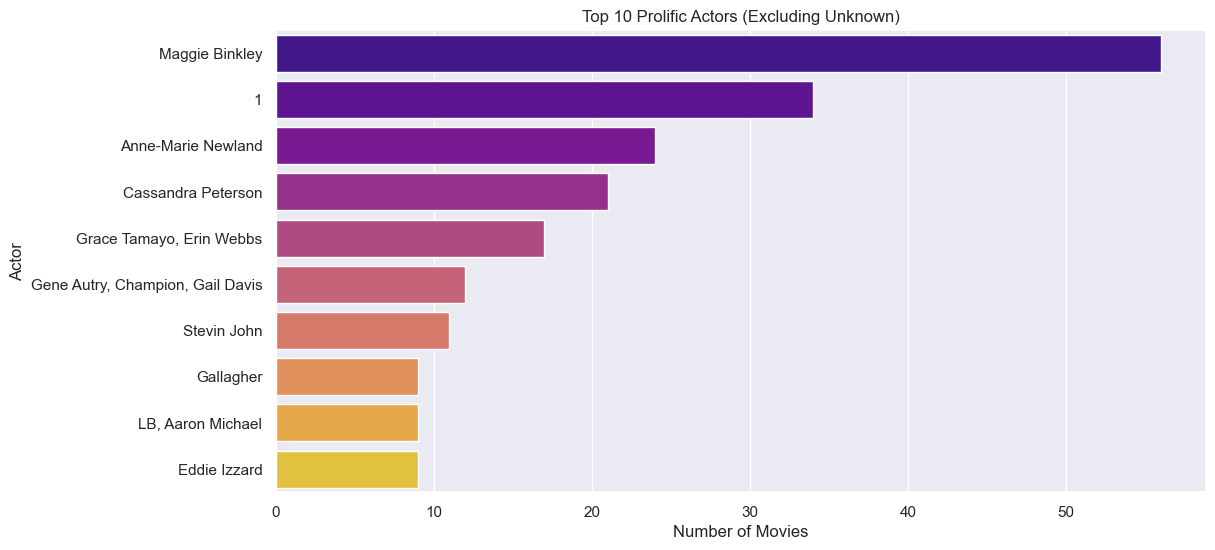

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='plasma')
plt.title('Top 10 Prolific Actors (Excluding Unknown)')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

 Here we visualizing the count of movies vs TV shows in a dataset . it will utilizes Seaborn to create a count plot, showcasing the distribution of content types

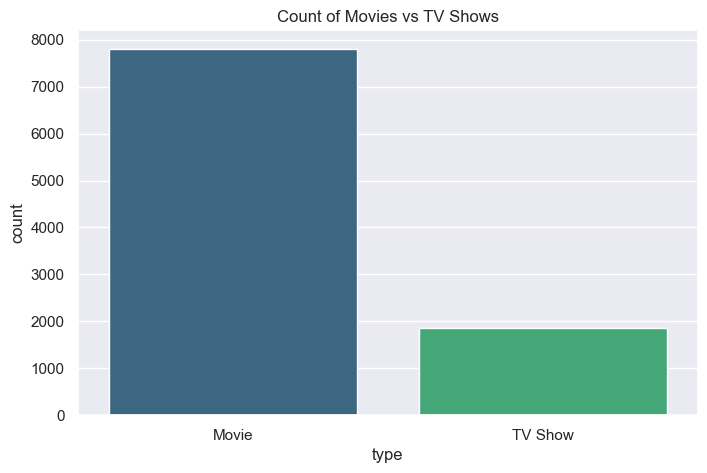

In [47]:
# Count of each content type (Movie vs. TV Show)
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='type', palette='viridis')
plt.title('Count of Movies vs TV Shows')
plt.show()

Here we generates a pie chart illustrating the ratio of movies to TV shows in the dataset. Each slice represents a content type, with percentages displayed, and labels showing counts. Seaborn and Matplotlib are utilized for visualization

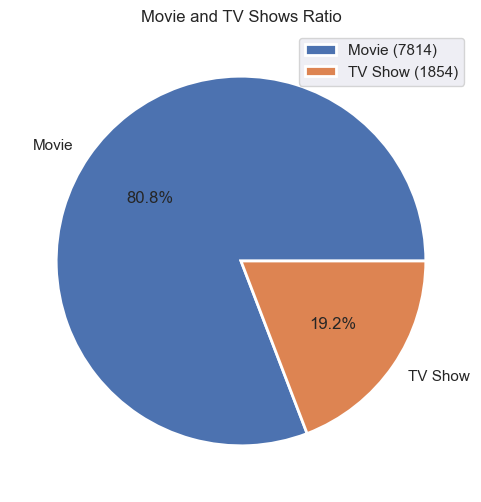

In [48]:
df_pie = data['type'].copy().value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    x=df_pie.values,labels=df_pie.index,autopct='%.1f%%',
    wedgeprops={'linewidth':2.0,'edgecolor':'white'}
    )
plt.title('Movie and TV Shows Ratio')
plt.legend(labels=[f"{label} ({count})" for label, count in zip(df_pie.index, df_pie.values)],loc='best')
plt.show()


using Seaborn to create a count plot displaying ratings across different content types (movies and TV shows)

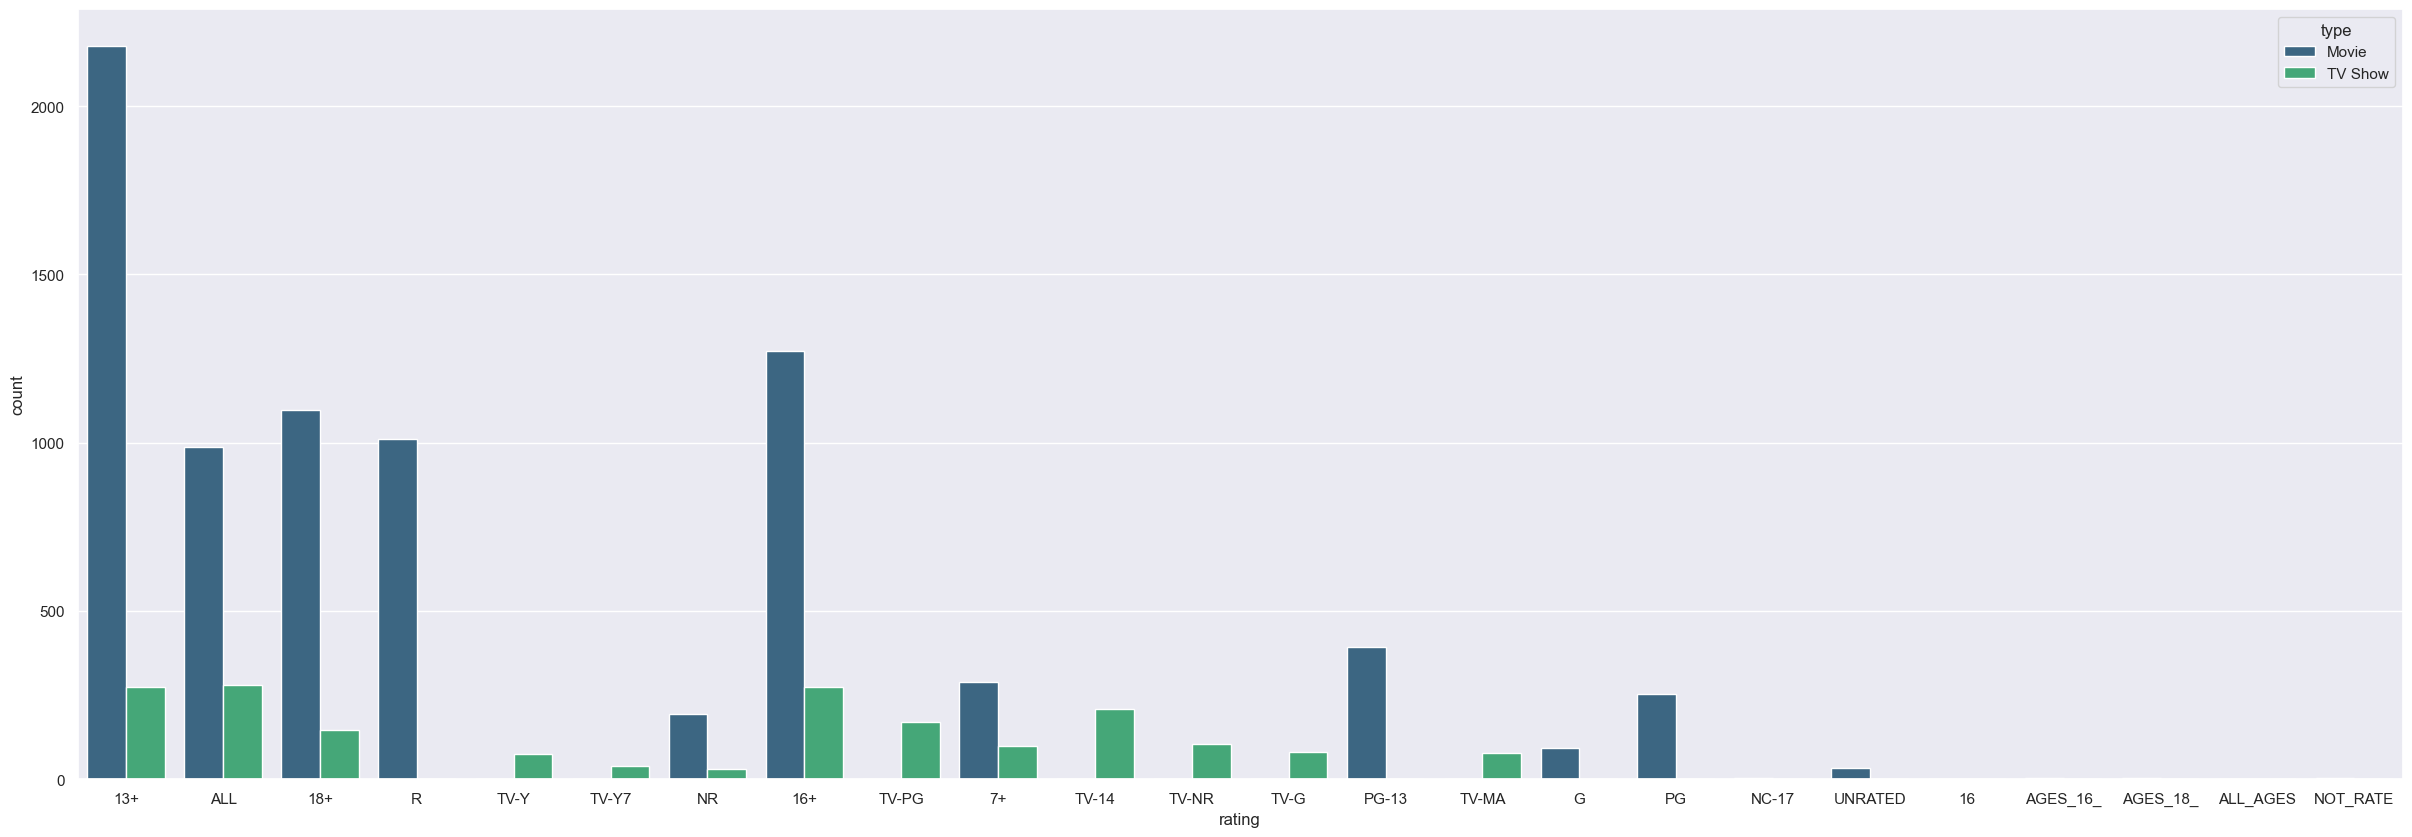

In [49]:
plt.figure(figsize=(30,10))
r = sns.countplot(x= data['rating'],data=data,hue = 'type',palette='viridis')

in ths we calculates and visualizes the number of titles released per country, focusing on the top 3 countries with the highest counts.usind seaborn to create a count plot

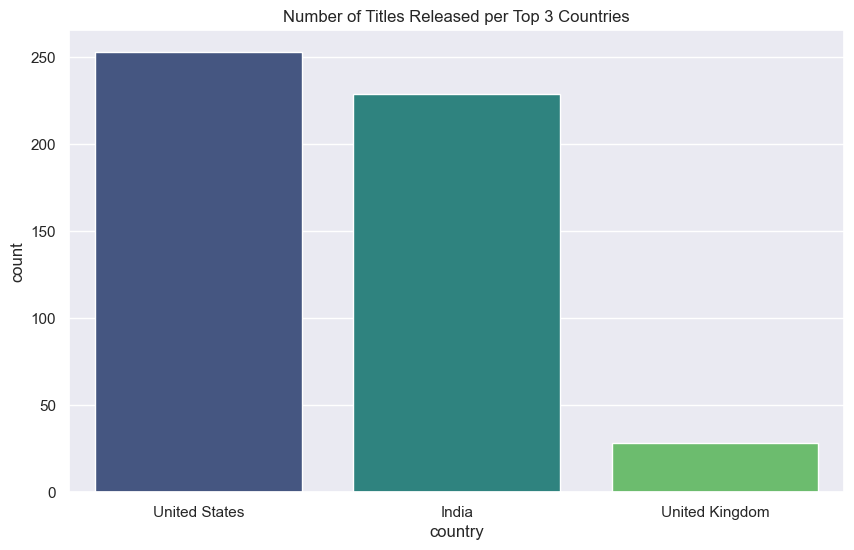

In [50]:
# Calculating the number of titles per country
filtered_country = data[data['country'] != 'Uavailable']
country_counts = filtered_country['country'].value_counts()

# Getting the top 3 countries
top_countries = country_counts.nlargest(3).index

# Filtering the DataFrame to include only the top 3 countries
df_top_countries = filtered_country[filtered_country['country'].isin(top_countries)]

# Plotting the number of titles released per top 3 countries
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_countries, x='country', palette='viridis', order=top_countries)
plt.title('Number of Titles Released per Top 3 Countries')
plt.show()

Provides a clear comparison of how movies and TV shows are distributed across the top countries, highlighting any differences in production volumes between the two content types

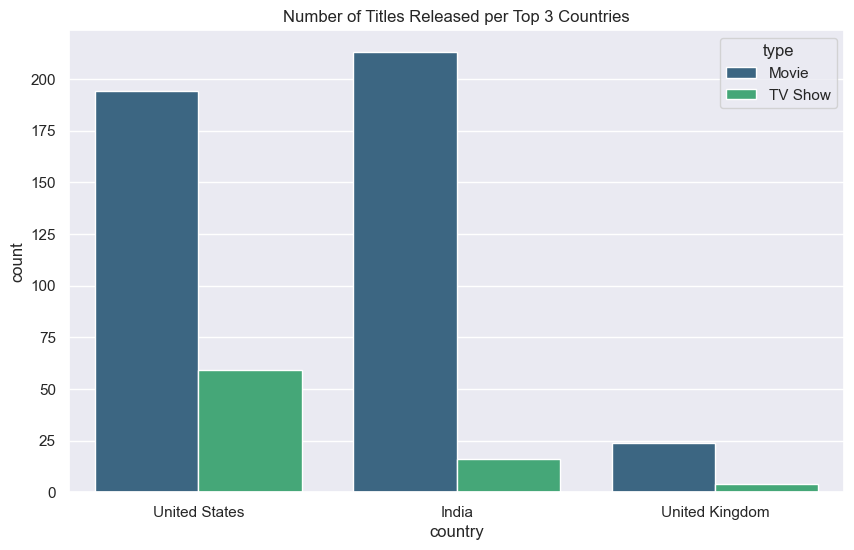

In [51]:
# Getting the top 3 countries
top_countries = country_counts.nlargest(3).index

# Filtering the DataFrame to include only the top 3 countries
df_top_countries = filtered_country[filtered_country['country'].isin(top_countries)]

# Plotting the number of titles released per top 3 countries
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_countries, x='country', hue = 'type', palette='viridis', order=top_countries)
plt.title('Number of Titles Released per Top 3 Countries')
plt.show()

In [ ]:
 using Seaborn to visualize the number of titles released per year for the top 10 years with the highest counts

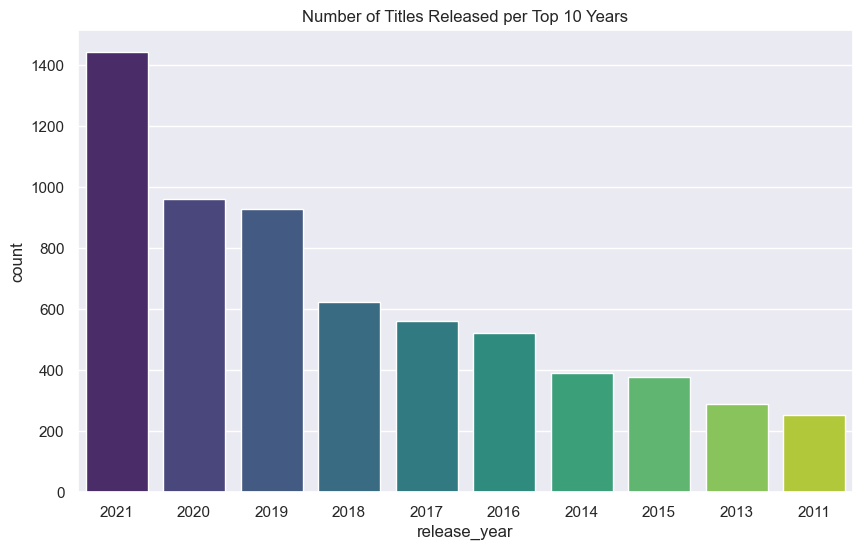

In [52]:
year_counts = data['release_year'].value_counts()

# Getting the top 10 release-year
top_years = year_counts.nlargest(10).index

# Filtering the DataFrame to include only the top 10 Years
df_top_years = data[data['release_year'].isin(top_years)]

# Plotting the number of titles released per top 10 Years
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_years, x='release_year', palette='viridis', order=top_years)
plt.title('Number of Titles Released per Top 10 Years')
plt.show()

to visualize the number of movie and TV show titles released per year for the top 10 years with the highest counts

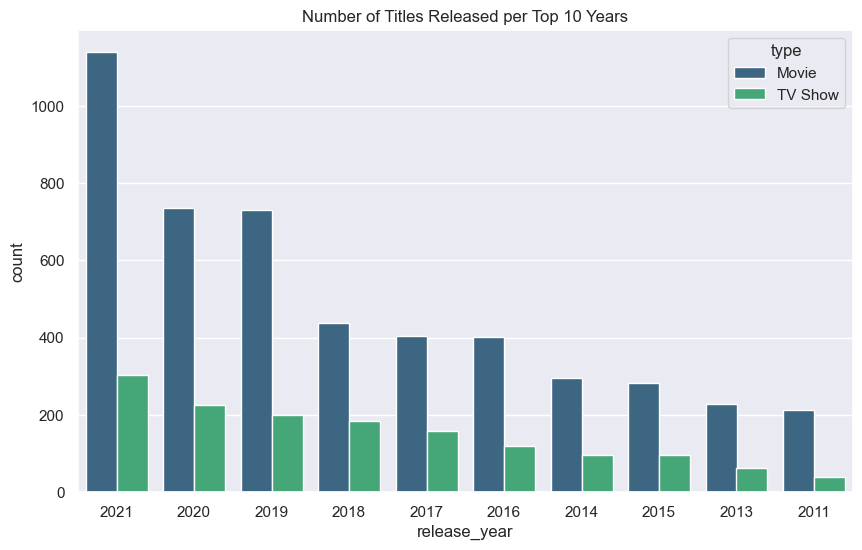

In [53]:
year_counts = data['release_year'].value_counts()

# Getting the top 10 release-year
top_years = year_counts.nlargest(10).index

# Filtering the DataFrame to include only the top 10 Years
df_top_years = data[data['release_year'].isin(top_years)]

# Plotting the number of titles released per top 10 Years
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_years, x='release_year', hue = 'type', palette='viridis', order=top_years)
plt.title('Number of Titles Released per Top 10 Years')
plt.show()

 using Seaborn to visualize the distribution of genres from a dataset, where genres are split from a 'listed_in' column and exploded into separate rows

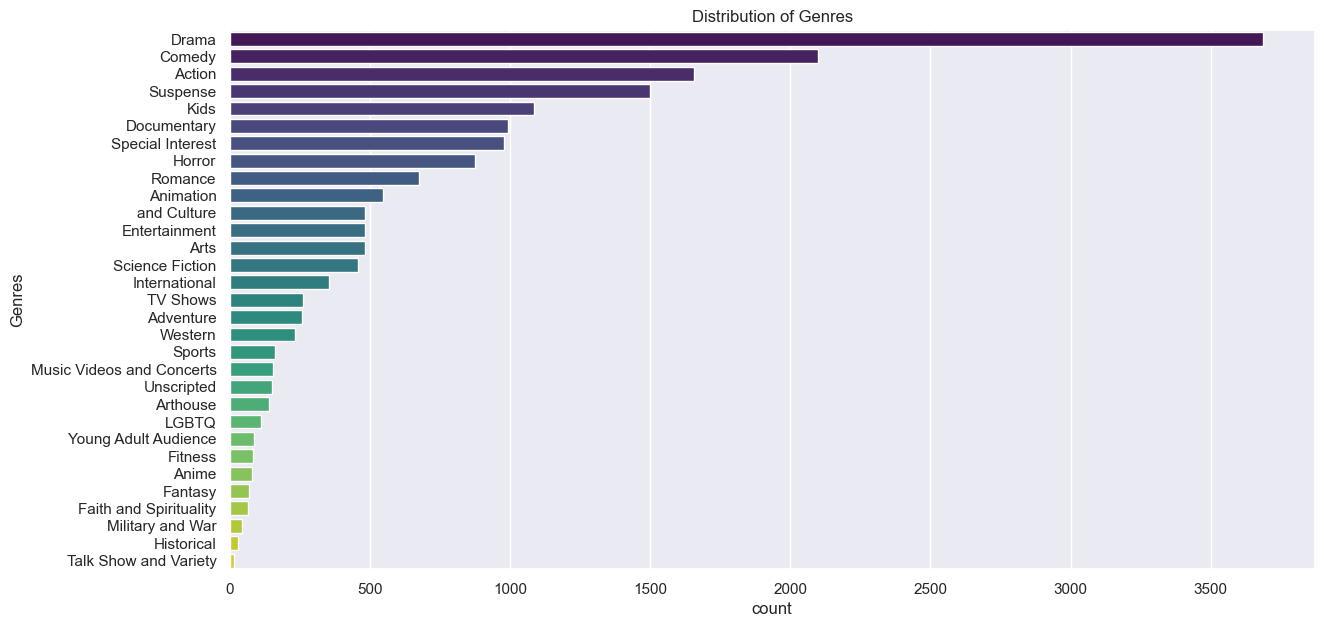

In [54]:
# Distribution of genres
# Splitting the genres
data['Genres'] = data['listed_in'].apply(lambda x: x.split(', '))

# Exploding the genres into separate rows
genres_exploded = data.explode('Genres')

plt.figure(figsize=(14, 7))
sns.countplot(data=genres_exploded, y='Genres', order=genres_exploded['Genres'].value_counts().index, palette='viridis')
plt.title('Distribution of Genres')
plt.show()


In [ ]:
 to visualize the frequency of genres extracted from a 'listed_in' column, displaying the top 5 genres with counts

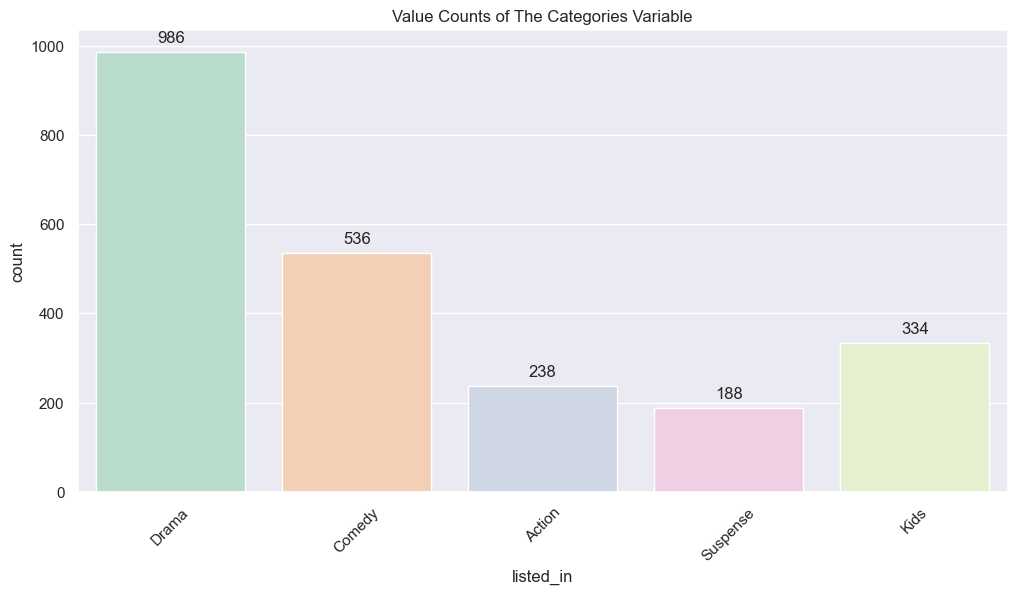

In [55]:
data['Genres'] = data['listed_in'].apply(lambda x: x.split(', '))
genres_exploded = data.explode('Genres')

plt.figure(figsize=(12, 6))
plt.title("Value Counts of The Categories Variable")
sns.set(style="darkgrid")
ax = sns.countplot(x="listed_in", data=genres_exploded, palette="Pastel2",
                   order=genres_exploded['Genres'].value_counts().iloc[:5].index)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Visualizing the top 10 longest movie durations and TV shows with the most seasons using Seaborn, with separate plots for movies and TV shows.

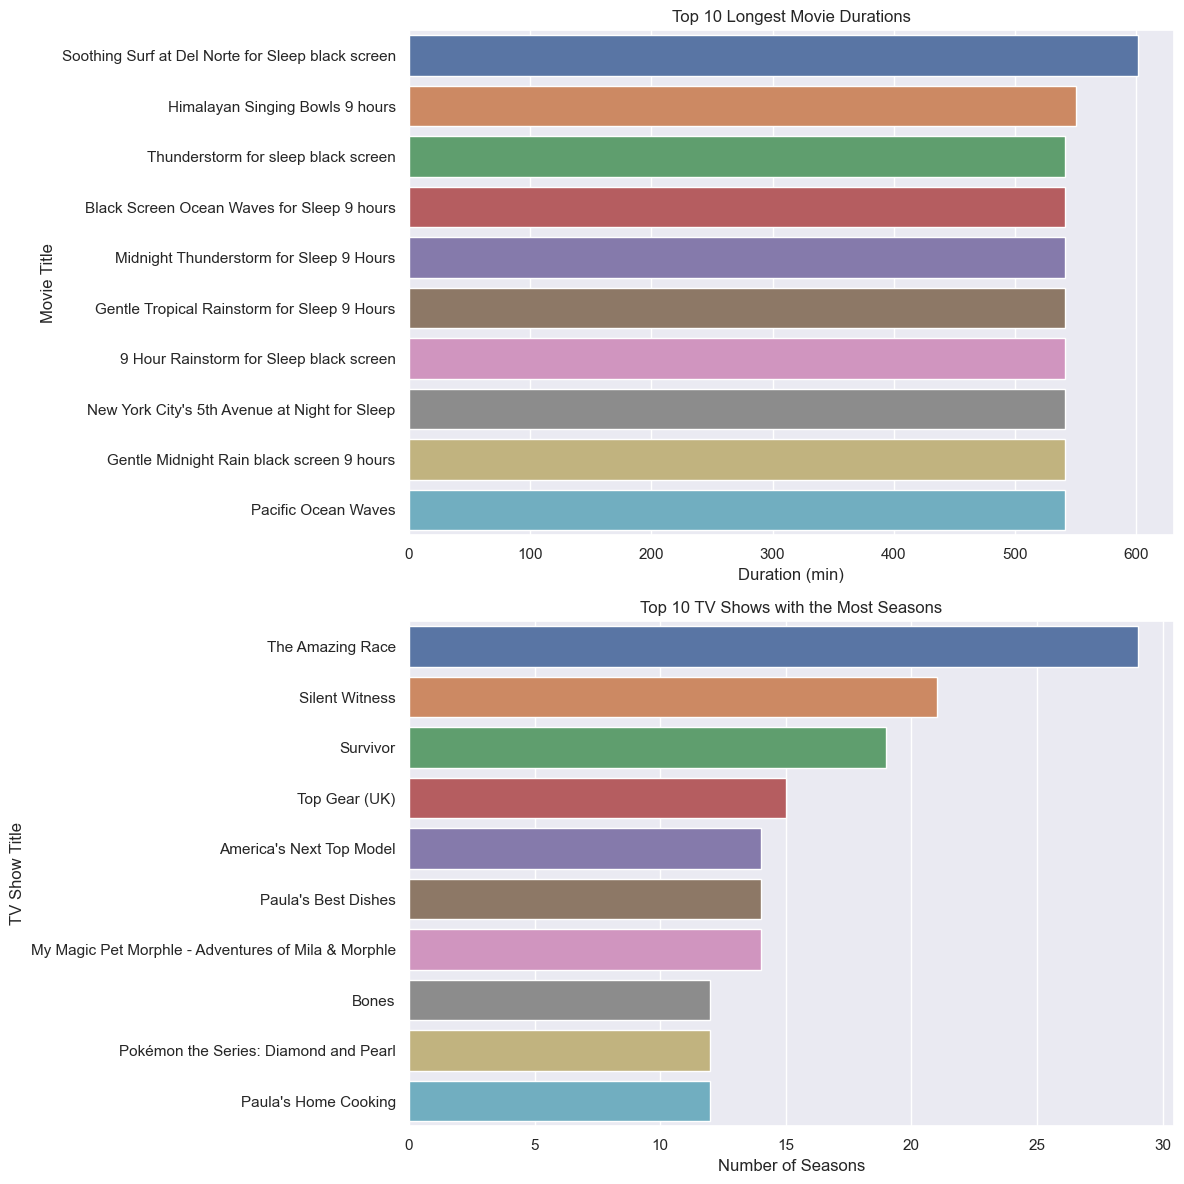

In [63]:
# Filter data for movies and TV shows separately
df_movies = data[data['type'] == 'Movie'].copy()
df_tv_shows = data[data['type'] == 'TV Show'].copy()

# Extract numeric duration for movies
df_movies['duration_num'] = df_movies['duration'].str.extract('(\d+)', expand=False).astype(float)

# Extract numeric duration for TV shows
df_tv_shows['duration_num'] = df_tv_shows['duration'].str.extract('(\d+)', expand=False).astype(float)

# Plotting
plt.figure(figsize=(12, 12))

# Subplot 1: Top 10 Longest Movie Duration
plt.subplot(2, 1, 1)
sns.barplot(data=df_movies.sort_values(by='duration_num', ascending=False).head(10), y='title', x='duration_num', orient='horizontal')
plt.title('Top 10 Longest Movie Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Movie Title')

# Subplot 2: Top 10 TV Shows with the Most Seasons
plt.subplot(2, 1, 2)
sns.barplot(data=df_tv_shows.sort_values(by='duration_num', ascending=False).head(10), y='title', x='duration_num', orient='horizontal')
plt.title('Top 10 TV Shows with the Most Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('TV Show Title')

plt.tight_layout()
plt.show()

 using WordCloud to generate and display a word cloud based on titles from a dataset, with a green colormap on a white background

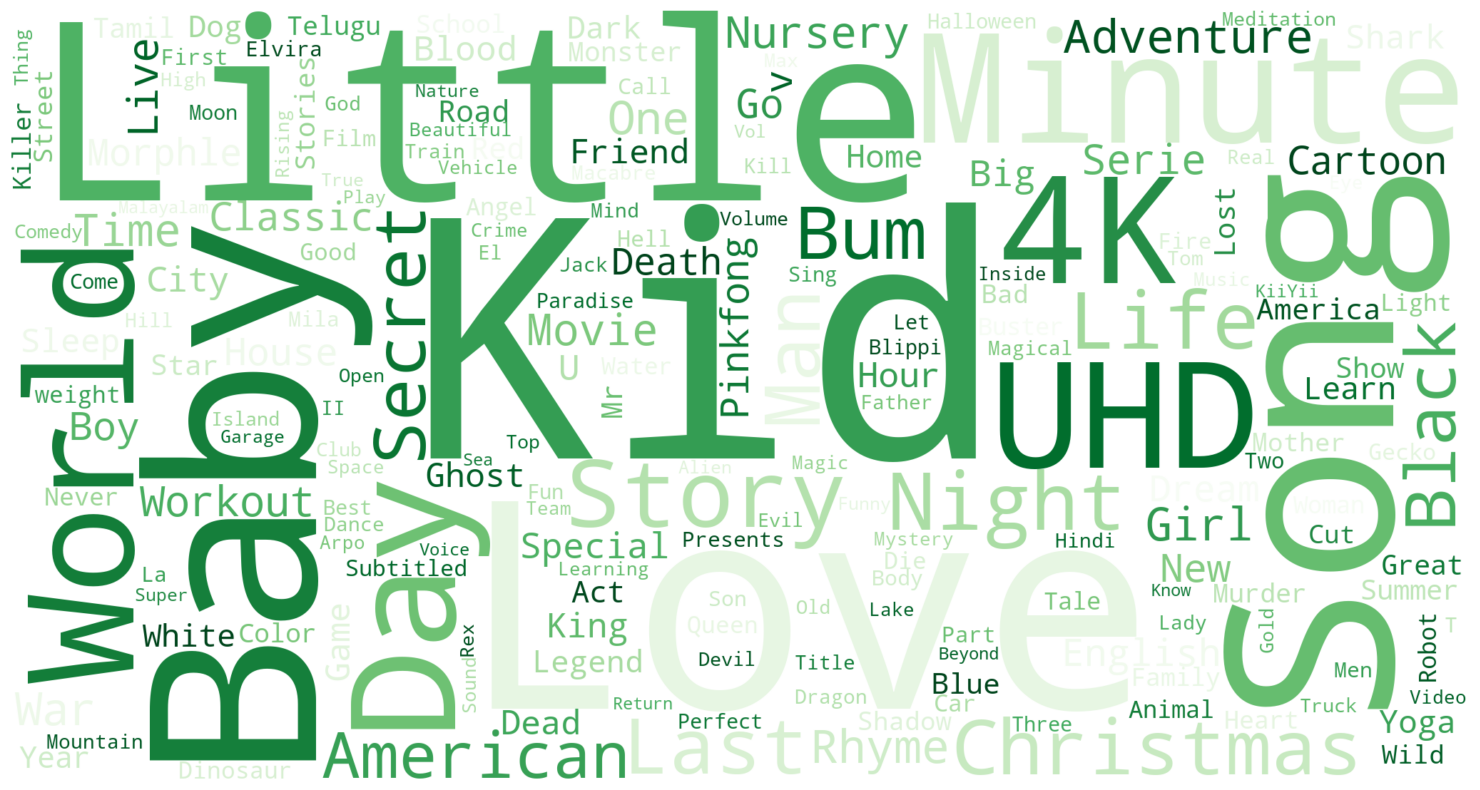

In [57]:
txt1 = " ".join(title for title in data.title)

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080,colormap='Greens_r').generate(txt1)

plt.figure(figsize=(30,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

WordCloud to generate and display a word cloud based on directors' names from a dataset

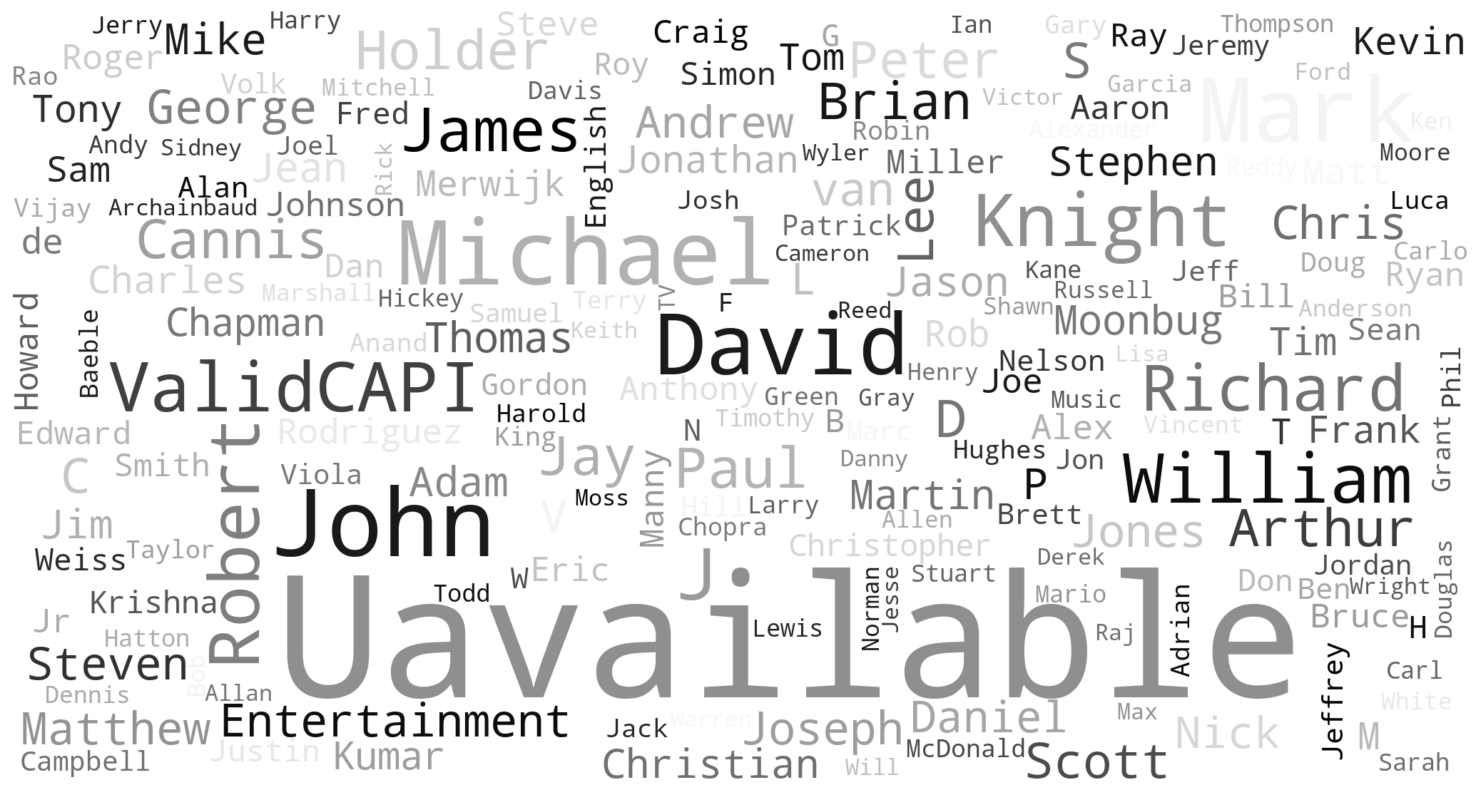

In [58]:
txt2 = " ".join(director for director in data.director)

word_cloud2 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080,colormap='gist_gray').generate(txt2)

plt.figure(figsize=(30,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()


 uses WordCloud to generate and display a word cloud of cast members' names from a dataset

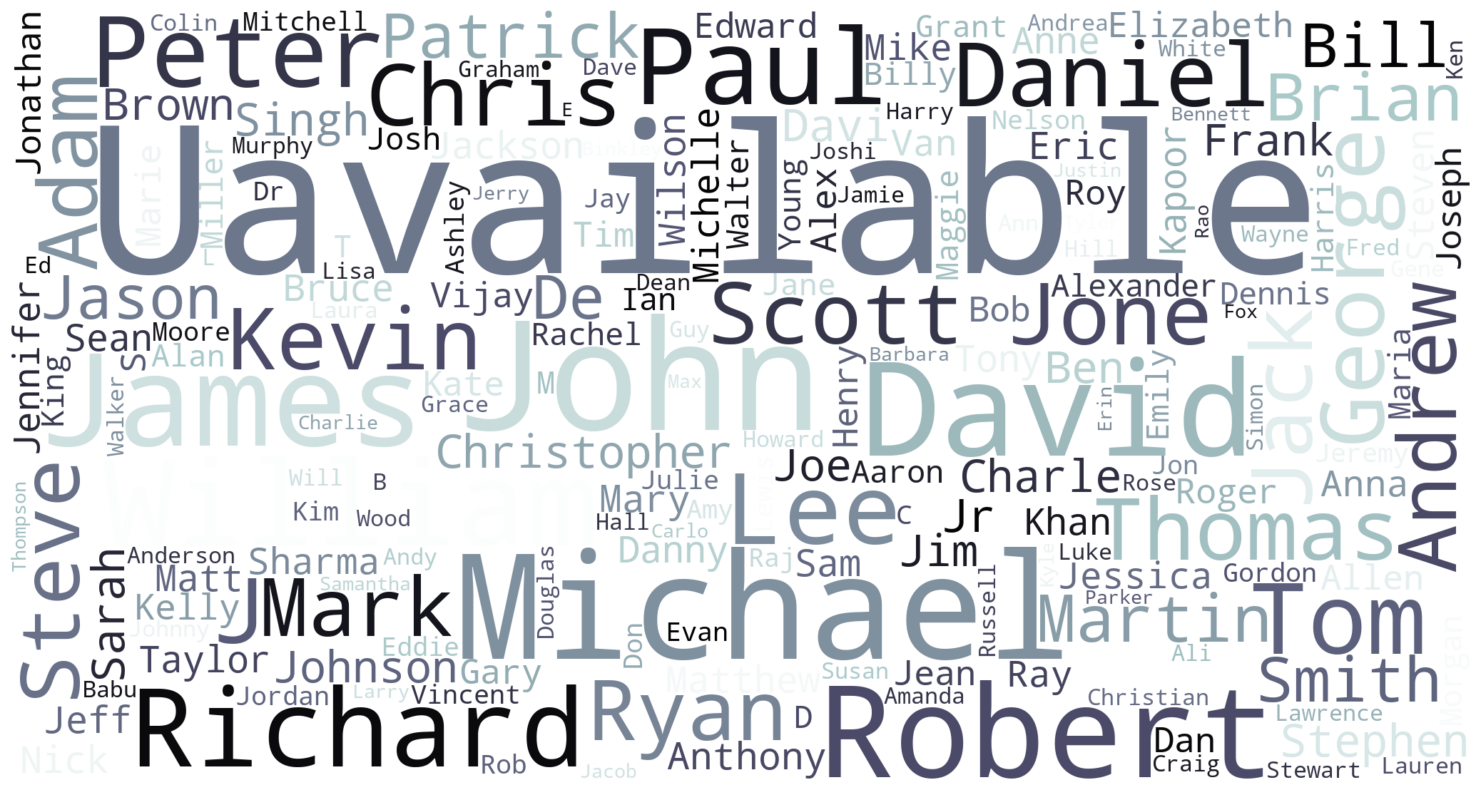

In [59]:
txt3 = " ".join(cast for cast in data.cast)

word_cloud3 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080,colormap='bone_r').generate(txt3)

plt.figure(figsize=(30,10))
plt.imshow(word_cloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

**Conclusion:**

Amazon Prime Video uploads more movie shows than TV shows.
The majority of shows uploaded on Amazon Prime Video originate from the US.
Over the last five years, there has been a consistent trend of more movie uploads compared to TV shows.
Drama emerges as the most uploaded show category on Amazon Prime Video.
Shows uploaded on Amazon Prime Video are predominantly directed by Mark Knight.
The most uploaded show rating on Amazon Prime Video falls under the 13+ category in the drama genre.